# Mortalities per Year (1990-2023)

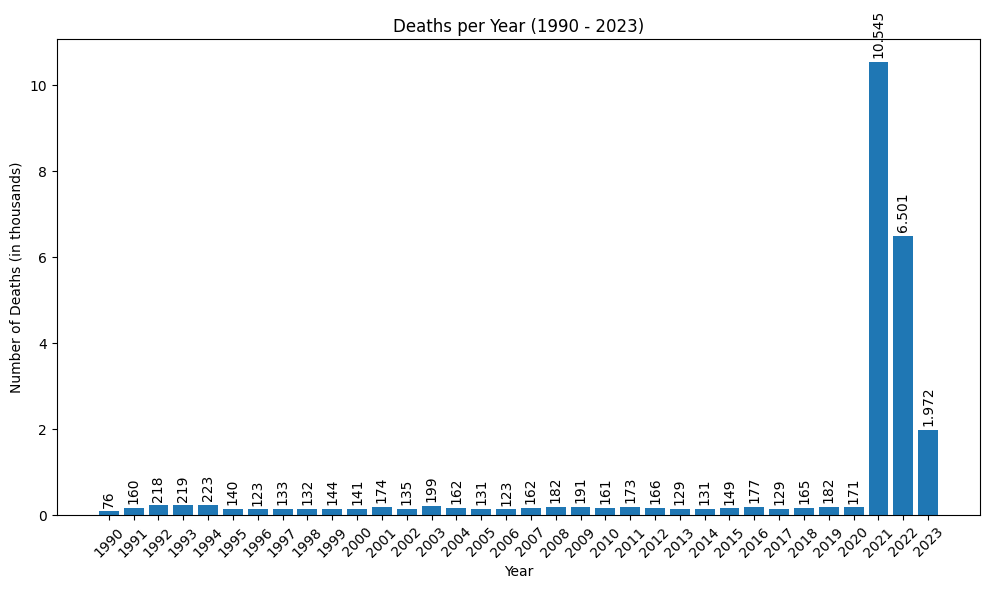

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Custom formatter function for y-axis in thousands
def thousands_formatter(y, pos):
    return f'{int(y / 1000)}'

deaths_per_year = {}

for year in range(1990, 2024):
    try:
        filename = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv"
        data = pd.read_csv(filename, encoding="Iso-8859-1", low_memory=False)
        deaths = (data['DIED'] == 'Y').sum()
        deaths_per_year[year] = deaths
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(deaths_per_year.keys(), deaths_per_year.values())

# Set the y-axis formatter for thousands
formatter = FuncFormatter(thousands_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Year')
plt.ylabel('Number of Deaths (in thousands)')
plt.title('Deaths per Year (1990 - 2023)')

# Annotating each bar with its value, formatted with a dot for thousands
for bar in bars:
    height = bar.get_height()
    formatted_height = f'{int(height):,}'.replace(',', '.')  # Format with a dot for thousands
    plt.text(bar.get_x() + bar.get_width() / 2, height + 100, formatted_height,
             ha='center', va='bottom', rotation=90)

# Set x-ticks to the years in the dataset
plt.xticks(list(deaths_per_year.keys()), rotation=45)

plt.tight_layout()
plt.show()

# Mortality Rate per Year (1990-2023)

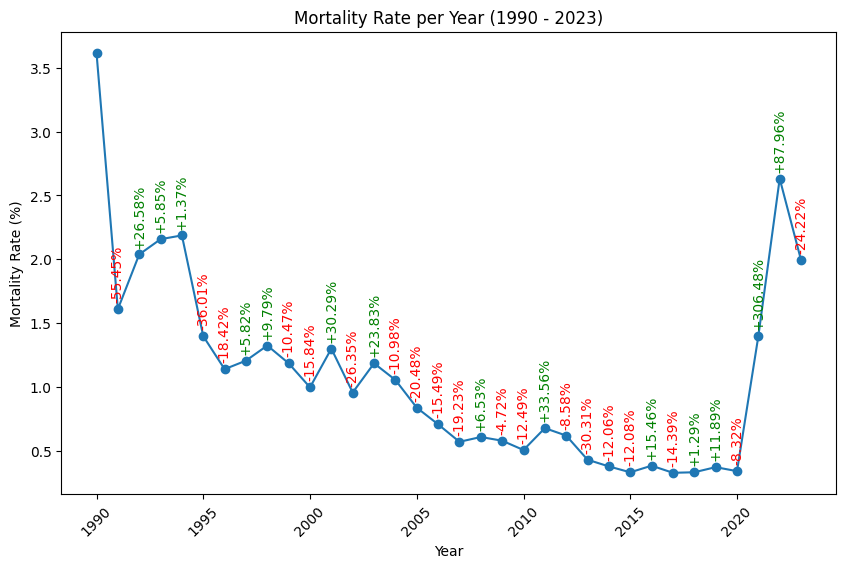

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

mortality_rates_per_year = {}

for year in range(1990, 2024):
    try:
        filename = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv"
        data = pd.read_csv(filename, encoding="Iso-8859-1", low_memory=False)
        total_entries = len(data)
        deaths = (data['DIED'] == 'Y').sum()
        mortality_rate = (deaths / total_entries) * 100 if total_entries > 0 else 0
        mortality_rates_per_year[year] = mortality_rate
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Calculate the percentage change compared to the previous year
percent_changes = {}
previous_rate = None
for year, rate in mortality_rates_per_year.items():
    if previous_rate is not None:
        percent_change = ((rate - previous_rate) / previous_rate) * 100 if previous_rate > 0 else 0
        percent_changes[year] = percent_change
    previous_rate = rate

# Plotting the data
plt.figure(figsize=(10, 6))
years = list(mortality_rates_per_year.keys())
rates = list(mortality_rates_per_year.values())
plt.plot(years, rates, marker='o')

plt.xlabel('Year')
plt.ylabel('Mortality Rate (%)')
plt.title('Mortality Rate per Year (1990 - 2023)')

# Annotating each point with the percentage change
for year, percent_change in percent_changes.items():
    x_pos = years.index(year)
    y_pos = mortality_rates_per_year[year]
    color = 'green' if percent_change > 0 else 'red'
    sign = '+' if percent_change > 0 else ''
    plt.text(year, y_pos + 0.05, f"{sign}{percent_change:.2f}%", rotation=90, color=color, va='bottom', ha='center')

plt.xticks(rotation=45)
plt.show()

# Highest Mortality Rates per Vaccine Type (1990-2023)

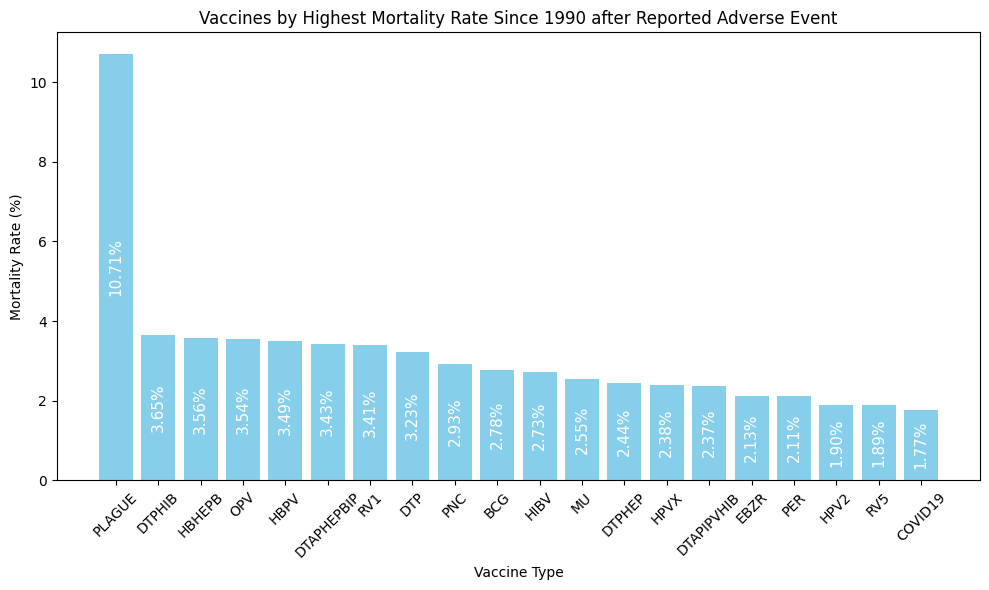

In [43]:
E import pandas as pd

vaccine_counts = {}
death_ids = {}

for year in range(1990, 2024):
    try:
        # Load data
        mortality_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv"
        vaccine_data_path = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSVAX.csv"
        mortality_data = pd.read_csv(mortality_data_path, encoding="Iso-8859-1", low_memory=False)
        vaccine_data = pd.read_csv(vaccine_data_path, encoding="Iso-8859-1", low_memory=False)

        # Process vaccine data
        for index, row in vaccine_data.iterrows():
            vax_type = row['VAX_TYPE']
            vaccine_counts[vax_type] = vaccine_counts.get(vax_type, 0) + 1

        # Process mortality data
        deaths_data = mortality_data[mortality_data['DIED'] == 'Y']
        for index, row in deaths_data.iterrows():
            vaers_id = row['VAERS_ID']
            death_vaccine_data = vaccine_data[vaccine_data['VAERS_ID'] == vaers_id]
            for _, vax_row in death_vaccine_data.iterrows():
                vax_type = vax_row['VAX_TYPE']
                if vax_type in death_ids:
                    if vaers_id not in death_ids[vax_type]:
                        death_ids[vax_type].add(vaers_id)
                else:
                    death_ids[vax_type] = {vaers_id}
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Calculate mortality rates
mortality_rates = {}
for vax_type in vaccine_counts:
    deaths = len(death_ids.get(vax_type, []))
    mortality_rate = (deaths / vaccine_counts[vax_type]) * 100 if vaccine_counts[vax_type] > 0 else 0
    mortality_rates[vax_type] = mortality_rate

# Sort and select top 20 vaccines
top_20_vaccines = sorted(mortality_rates.items(), key=lambda item: item[1], reverse=True)[:20]

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
bars = plt.bar([item[0] for item in top_20_vaccines], [item[1] for item in top_20_vaccines], color='skyblue')
plt.xlabel('Vaccine Type')
plt.ylabel('Mortality Rate (%)')
plt.title('Vaccines by Highest Mortality Rate Since 1990 after Reported Adverse Event')

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval:.2f}%', ha='center', va='center', fontsize=11, color='white', rotation=90)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
top_20_vaccines

[('PLAGUE', 10.714285714285714),
 ('DTPHIB', 3.6531183149580384),
 ('HBHEPB', 3.56483191725157),
 ('OPV', 3.5402337651377693),
 ('HBPV', 3.488372093023256),
 ('DTAPHEPBIP', 3.4261413784803016),
 ('RV1', 3.4087184529662404),
 ('DTP', 3.2301480484522207),
 ('PNC', 2.933390264730999),
 ('BCG', 2.7777777777777777),
 ('HIBV', 2.725920707604399),
 ('MU', 2.547770700636943),
 ('DTPHEP', 2.4390243902439024),
 ('HPVX', 2.383134738771769),
 ('DTAPIPVHIB', 2.370007150883645),
 ('EBZR', 2.127659574468085),
 ('PER', 2.112676056338028),
 ('HPV2', 1.9011406844106464),
 ('RV5', 1.8871539419484624),
 ('COVID19', 1.7731046258316487)]